<a href="https://colab.research.google.com/github/ayeshnayana/Car_brand_classifier/blob/master/Car_brand_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ayeshnayana/Car_brand_classifier.git

Cloning into 'Car_brand_classifier'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [2]:
!ls

Car_brand_classifier  sample_data


In [3]:
cd Car_brand_classifier

/content/Car_brand_classifier


In [4]:
!ls

README.md  resized.zip


In [5]:
from zipfile import ZipFile
file_name = "resized.zip"
#openning the zip file in the readme mode 
with ZipFile(file_name,'r') as zip:
  print('extracting the file')
  zip.extractall()
  print('done')

extracting the file
done


In [6]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Car_brand_classifier/resized/train'
valid_path = '/content/Car_brand_classifier/resized/test'

In [8]:
# Import the ResNet50 library as shown below and add preprocessing layer to the front of Residual Network
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [9]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [11]:
# useful for getting number of output classes
folders = glob('/content/Car_brand_classifier/resized/train/*')

In [12]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [14]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Car_brand_classifier/resized/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 398 images belonging to 8 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/Car_brand_classifier/resized/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 263 images belonging to 8 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
13/13 [==============================] - 6s 471ms/step - loss: 14.3571 - accuracy: 0.1131 - val_loss: 10.4264 - val_accuracy: 0.1103
Epoch 2/50
13/13 [==============================] - 5s 400ms/step - loss: 5.9968 - accuracy: 0.1533 - val_loss: 5.1582 - val_accuracy: 0.1673
Epoch 3/50
13/13 [==============================] - 5s 399ms/step - loss: 4.0034 - accuracy: 0.1457 - val_loss: 4.1196 - val_accuracy: 0.1673
Epoch 4/50
13/13 [==============================] - 5s 399ms/step - loss: 2.8046 - accuracy: 0.1683 - val_loss: 2.6011 - val_accuracy: 0.1331
Epoch 5/50
13/13 [==============================] - 5s 404ms/step - loss: 2.2458 - accuracy: 0.2412 - val_loss: 2.3439 - val_accuracy: 0.1939
Epoch 6/50
13/13 [==============================] - 5s 403ms/step - loss: 2.1076 - accuracy: 0.2462 - val_loss: 2.5813 - val_accuracy: 0.1141
Epoch 7/50
13/13 [==============================] - 5s 401ms/step - lo

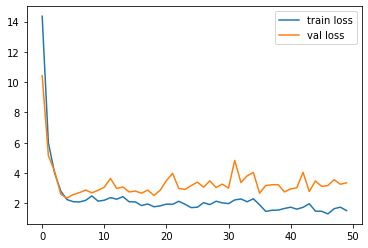

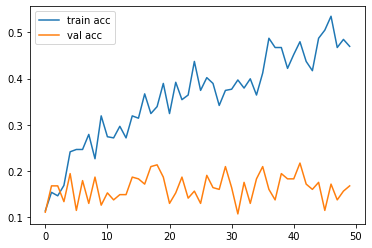

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [23]:
y_pred = model.predict(test_set)

In [24]:
y_pred

array([[6.5544839e-03, 1.1843061e-02, 2.0948978e-04, ..., 4.2501524e-02,
        2.8952064e-03, 4.5947367e-03],
       [1.6765416e-01, 6.9711953e-03, 7.6700556e-03, ..., 1.0787590e-01,
        6.1030942e-01, 1.9647460e-02],
       [1.0880646e-01, 6.5566082e-03, 1.1341885e-02, ..., 2.7408883e-01,
        5.1891308e-02, 1.9966733e-02],
       ...,
       [4.4567031e-01, 6.0966086e-02, 1.6784113e-03, ..., 1.1031051e-01,
        3.1344804e-01, 5.9463009e-02],
       [3.3105109e-02, 3.0882573e-01, 1.6958788e-02, ..., 2.5336943e-03,
        6.2511128e-01, 1.6150975e-03],
       [3.2647958e-01, 2.4487134e-02, 5.2519580e-03, ..., 3.1845349e-01,
        1.7244443e-01, 1.3859497e-01]], dtype=float32)

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [26]:
y_pred

array([4, 6, 4, 6, 0, 5, 6, 6, 4, 6, 7, 5, 1, 5, 7, 7, 5, 5, 5, 5, 4, 1,
       6, 6, 5, 4, 0, 5, 5, 4, 6, 6, 5, 5, 0, 6, 1, 0, 5, 6, 5, 6, 4, 6,
       5, 1, 0, 5, 5, 5, 6, 5, 6, 5, 4, 7, 0, 5, 6, 1, 6, 1, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 5, 1, 4, 5, 6, 5, 6, 1, 5, 5, 6, 0, 5, 1,
       4, 6, 0, 6, 6, 4, 5, 0, 5, 6, 6, 6, 0, 4, 0, 5, 1, 6, 5, 4, 0, 4,
       1, 6, 5, 0, 5, 7, 0, 6, 5, 0, 0, 6, 6, 5, 6, 6, 7, 5, 4, 5, 6, 5,
       6, 0, 5, 5, 5, 5, 1, 6, 0, 0, 6, 5, 4, 1, 6, 6, 4, 6, 5, 0, 0, 6,
       5, 5, 0, 5, 4, 6, 4, 5, 6, 5, 5, 6, 6, 5, 6, 0, 1, 5, 5, 0, 6, 5,
       1, 5, 7, 1, 0, 6, 0, 0, 0, 6, 5, 1, 5, 6, 6, 6, 6, 1, 6, 5, 4, 0,
       0, 1, 6, 1, 0, 5, 6, 6, 0, 5, 5, 7, 0, 7, 5, 0, 5, 5, 6, 7, 5, 1,
       1, 6, 5, 0, 6, 1, 5, 6, 6, 0, 0, 4, 5, 5, 0, 5, 0, 0, 5, 5, 6, 6,
       0, 6, 0, 7, 0, 4, 4, 0, 5, 5, 0, 6, 0, 5, 5, 0, 5, 0, 0, 6, 0])

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
model=load_model('model_resnet50.h5')

In [29]:
img=image.load_img('/content/Car_brand_classifier/resized/test/Escalade/cd6.jpg',target_size=(224,224))

In [30]:
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [31]:
x.shape

(224, 224, 3)

In [32]:
x=x/255

In [33]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [34]:
model.predict(img_data)

array([[1.5149064e-07, 4.8922182e-08, 2.2282770e-12, 1.2203522e-05,
        9.9874914e-01, 1.2375196e-03, 9.6000031e-07, 5.7927590e-11]],
      dtype=float32)

In [35]:
a=np.argmax(model.predict(img_data), axis=1)

In [36]:
a==4

array([ True])